In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [27]:
print(tf.__version__)

2.10.0


In [29]:
np.random.seed(101)
tf.compat.v1.set_random_seed(101)

In [31]:
# Generating random linear data
# There will be 50 data points ranging from 0 to 50
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

n = len(x) # Number of data points



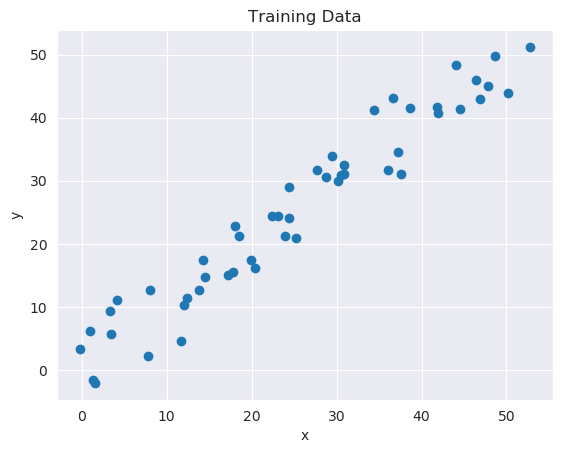

In [32]:
# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()


In [34]:
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder("float")
Y = tf.compat.v1.placeholder("float")



In [37]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")


In [38]:
learning_rate = 0.01
training_epochs = 1000

In [40]:
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)

# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

# Gradient Descent Optimizer
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer
init = tf.compat.v1.global_variables_initializer()



In [44]:
# Starting the Tensorflow Session
with tf.compat.v1.Session() as sess:

	# Initializing the Variables
	sess.run(init)

	# Iterating through all the epochs
	for epoch in range(training_epochs):

		# Feeding each data point into the optimizer using Feed Dictionary
		for (_x, _y) in zip(x, y):
			sess.run(optimizer, feed_dict = {X : _x, Y : _y})

		# Displaying the result after every 50 epochs
		if (epoch + 1) % 50 == 0:
			# Calculating the cost a every epoch
			c = sess.run(cost, feed_dict = {X : x, Y : y})
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))

	# Storing necessary values to be used outside the Session
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
	weight = sess.run(W)
	bias = sess.run(b)



2022-10-07 18:39:50.286843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 18:39:50.288566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 18:39:50.289319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 18:39:50.292405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 18:39:50.293887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Epoch 50 : cost = 6.987109 W = 0.9619729 b = 0.26440322
Epoch 100 : cost = 6.912347 W = 0.95846134 b = 0.44170102
Epoch 150 : cost = 6.854391 W = 0.95531446 b = 0.6005898
Epoch 200 : cost = 6.809722 W = 0.9524942 b = 0.742983
Epoch 250 : cost = 6.775526 W = 0.9499669 b = 0.8705906
Epoch 300 : cost = 6.7495675 W = 0.94770193 b = 0.9849491
Epoch 350 : cost = 6.730068 W = 0.9456722 b = 1.0874336
Epoch 400 : cost = 6.7156186 W = 0.94385314 b = 1.1792758
Epoch 450 : cost = 6.7050953 W = 0.9422231 b = 1.2615815
Epoch 500 : cost = 6.6976156 W = 0.9407622 b = 1.3353394
Epoch 550 : cost = 6.6924777 W = 0.939453 b = 1.4014401
Epoch 600 : cost = 6.6891317 W = 0.9382798 b = 1.4606769
Epoch 650 : cost = 6.6871424 W = 0.9372283 b = 1.5137675
Epoch 700 : cost = 6.6861715 W = 0.9362859 b = 1.5613488
Epoch 750 : cost = 6.685952 W = 0.93544143 b = 1.6039885
Epoch 800 : cost = 6.6862803 W = 0.9346846 b = 1.6421989
Epoch 850 : cost = 6.686994 W = 0.9340064 b = 1.676443
Epoch 900 : cost = 6.6879706 W = 0.9